In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import geeksw.hgcal.testbeam as hgc

In [9]:
electron_runlist = hgc.runlist.query("Particle == 'electron'").groupby("Energy").apply(lambda x : x.iloc[1])
electron_runlist

,Run,Date,Nevents,Particle,Energy,Configuration,CaloConfiguration
Energy,,,,,,,
20,437,2018-10-14 01:04:00,10274,electron,20,22b,1
30,595,2018-10-15 17:30:00,10291,electron,30,22b,1
50,457,2018-10-14 04:53:00,10050,electron,50,22b,1
80,467,2018-10-14 06:57:00,13423,electron,80,22b,1
100,479,2018-10-14 10:12:00,10240,electron,100,22b,1
120,621,2018-10-15 23:40:00,11361,electron,120,22b,1
150,494,2018-10-14 12:40:00,12220,electron,150,22b,1
200,665,2018-10-16 12:43:00,10239,electron,200,22b,1
250,385,2018-10-13 10:31:00,10161,electron,250,22b,1


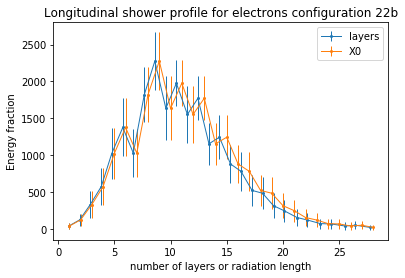

In [5]:
hdf = hgc.load_run(385, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
energy = hdf.beamEnergy.values[0]
x0_max = hdf.query("rechit_layer == 28").rechit_X0.values[0]
energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
energy_sums = energy_sums.reset_index()
energy_sums_mean = energy_sums.groupby("rechit_X0").median()
energy_sums_variance = energy_sums.groupby("rechit_X0").std()
energy_sums_variance = energy_sums_variance.reset_index()
energy_sums_mean = energy_sums_mean.reset_index()
energy_sums_mean = energy_sums_mean[energy_sums_mean.rechit_X0 <= x0_max]
energy_sums_variance = energy_sums_variance[energy_sums_variance.rechit_X0 <= x0_max]
plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label="layers")


energyt = hdf.beamEnergy.values[0]
x0_max = hdf.query("rechit_layer == 28").rechit_layer.values[0]
energy_sumst = hdf.groupby(["rechit_layer","event"]).rechit_energy.sum()
energy_sumst = energy_sumst.reset_index()
energy_sums_meant = energy_sumst.groupby("rechit_layer").median()
energy_sums_variancet = energy_sumst.groupby("rechit_layer").std()
energy_sums_variancet = energy_sums_variancet.reset_index()
energy_sums_meant = energy_sums_meant.reset_index()
energy_sums_meant = energy_sums_meant[energy_sums_meant.rechit_layer <= x0_max]
energy_sums_variancet = energy_sums_variancet[energy_sums_variancet.rechit_layer <= x0_max]
plt.errorbar(energy_sums_meant.rechit_layer, energy_sums_meant.rechit_energy, yerr=energy_sums_variancet.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label="X0")
plt.legend(loc="upper right")
plt.xlabel("number of layers or radiation length")
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons configuration 22b")
plt.show()

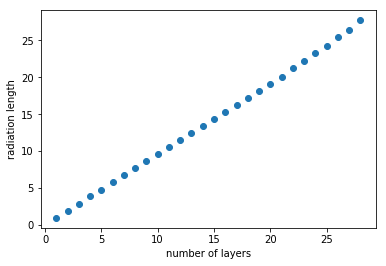

In [9]:
plt.scatter(energy_sums_meant.rechit_layer,energy_sums_mean.rechit_X0)
plt.xlabel("number of layers")
plt.ylabel("radiation length")
plt.show()

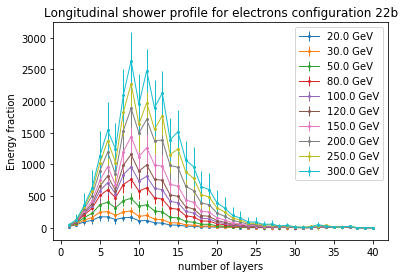

In [5]:
run_numbers = electron_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_layer","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_layer").median()
    energy_sums_variance = energy_sums.groupby("rechit_layer").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    #energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sums_mean["rechit_energy"].sum()
    #energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sums_variance["rechit_energy"].sum()
    #energy_sums_mean
    #energy_sums_variance
    plt.errorbar(energy_sums_mean.rechit_layer, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel("number of layers")
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons configuration 22b")
plt.show()

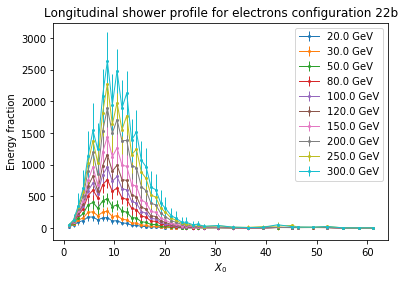

In [23]:
run_numbers = electron_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    #energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sums_mean["rechit_energy"].sum()
    #energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sums_variance["rechit_energy"].sum()
    #energy_sums_mean
    #energy_sums_variance
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons configuration 22b")
plt.show()

In [24]:
electron_runlist = hgc.runlist.query("Particle == 'electron'").groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = electron_runlist.Run.values[::3]
run_numbers

array([437, 467, 494, 406])

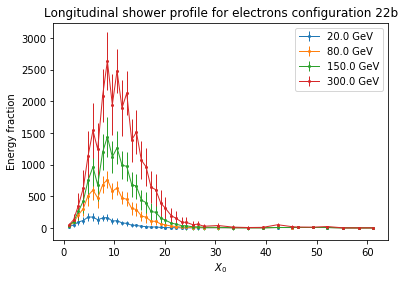

In [25]:
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    #energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sums_mean["rechit_energy"].sum()
    #energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sums_variance["rechit_energy"].sum()
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons configuration 22b")
plt.show()

In [26]:
#energy_sums = hdf.groupby(["rechit_layer","event"]).rechit_energy.sum()
#energy_sums = energy_sums.reset_index()
#energy_sums_mean = energy_sums.groupby("rechit_layer").median()
#energy_sums_variance = energy_sums.groupby("rechit_layer").std()
#energy_sums_variance = energy_sums_variance.reset_index()
#energy_sums_mean = energy_sums_mean.reset_index()
#energy_sums_mean
#energy_sums_variance
#plt.errorbar(energy_sums_mean.rechit_layer, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o")
#plt.show()

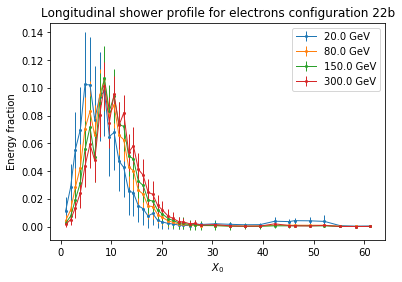

In [27]:
electron_runlist = hgc.runlist.query("Particle == 'electron'").groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = electron_runlist.Run.values[::3]
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
    energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
    energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons configuration 22b")
plt.show()

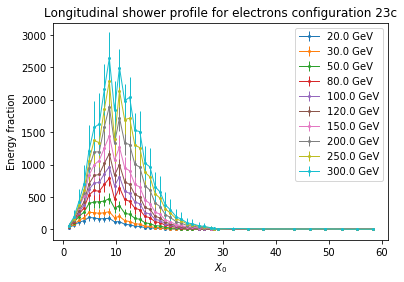

In [28]:
electron_runlist = hgc.runlist.query("Particle == 'electron'").query('Configuration == "23c"').groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = electron_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    #energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sums_mean["rechit_energy"].sum()
    #energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sums_variance["rechit_energy"].sum()
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons configuration 23c")
plt.show()

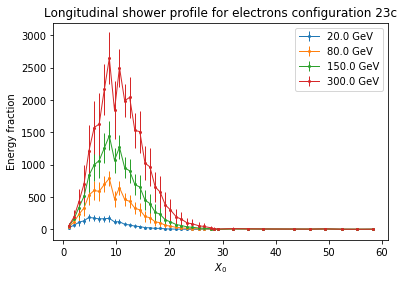

In [29]:
electron_runlist = hgc.runlist.query("Particle == 'electron'").query('Configuration == "23c"').groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = electron_runlist.Run.values[::3]
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    #energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sums_mean["rechit_energy"].sum()
    #energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sums_variance["rechit_energy"].sum()
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons configuration 23c")
plt.show()

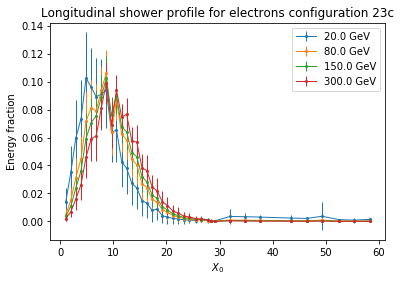

In [30]:
electron_runlist = hgc.runlist.query("Particle == 'electron'").query('Configuration == "23c"').groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = electron_runlist.Run.values[::3]
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
    energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
    energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons configuration 23c")
plt.show()

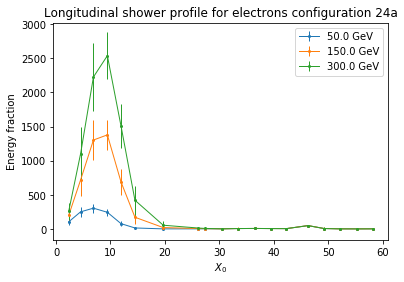

In [31]:
electron_runlist = hgc.runlist.query("Particle == 'electron'").query('Configuration == "24a"').groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = electron_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
    #energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
    #energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons configuration 24a")
plt.show()

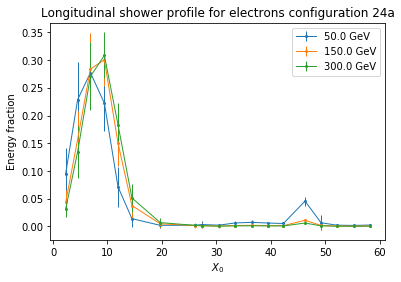

In [32]:
electron_runlist = hgc.runlist.query("Particle == 'electron'").query('Configuration == "24a"').groupby("Energy").apply(lambda x : x.iloc[1])
run_numbers = electron_runlist.Run.values
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
    energy = hdf.beamEnergy.values[0]
    energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
    energy_sums = energy_sums.reset_index()
    energy_sums_mean = energy_sums.groupby("rechit_X0").median()
    energy_sums_variance = energy_sums.groupby("rechit_X0").std()
    energy_sums_variance = energy_sums_variance.reset_index()
    energy_sums_mean = energy_sums_mean.reset_index()
    energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
    energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
    energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons configuration 24a")
plt.show()